In [29]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, r2_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

### Reading Data

In [2]:
# Read Seattle Collison Data, .csv file
df = pd.read_csv("Collisions.csv")

### Feature Selection

In [3]:
# Keep columns which are predictors
df2 = df.loc[:,['ADDRTYPE', 'SEVERITYCODE', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', \
         'FATALITIES', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'SPEEDING', 'HITPARKEDCAR']]

### Cleaning Data

#### Removing Null Values

In [4]:
# Removing Null values
df2.replace({'ADDRTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df2.replace({'COLLISIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df2.replace({'JUNCTIONTYPE' : {np.nan : 'Unknown'}}, inplace=True)
df2.replace({'INATTENTIONIND' : {np.nan: 'N'}}, inplace=True)
df2.replace({'UNDERINFL' : {np.nan : 'Unknown', '0': 'N', '1': 'Y'}}, inplace=True)
df2.replace({'ROADCOND' : {np.nan: 'Unknown'}}, inplace=True)
df2.replace({'LIGHTCOND' : {np.nan: 'Unknown'}}, inplace=True)
df2.replace({'WEATHER' : {np.nan : 'Unknown'}}, inplace=True)
df2.replace({'SPEEDING' : {np.nan: 'N'}}, inplace=True)

#### Removing Unkonwn Collision Severity Type

In [5]:
# Removing 'Unknown' severity (SEVERITYCODE = 0)
df2['SEVERITYCODE'].replace('0', np.nan, inplace=True)
df2.dropna(axis=0, how='any',thresh=None, subset=['SEVERITYCODE'], inplace=True)

In [6]:
# Shift severity 2b to 3, and severity 3 to 4
df2['SEVERITYCODE'].replace('3', '4', inplace=True)
df2['SEVERITYCODE'].replace('2b', '3', inplace=True)

#### Balancing Data

In [7]:
# Convert severity type to integer type
df2['SEVERITYCODE'] = df2['SEVERITYCODE'].astype('int')
df2['Severity1'] = 0
df2.loc[df2['SEVERITYCODE'] == 1, 'Severity1'] = 1
df2['Severity2'] = 0
df2.loc[df2['SEVERITYCODE'] == 2, 'Severity2'] = 1
df2['Severity3'] = 0
df2.loc[df2['SEVERITYCODE'] == 3, 'Severity3'] = 1
df2['Severity4'] = 0
df2.loc[df2['SEVERITYCODE'] == 4, 'Severity4'] = 1
# Undersample/Oversample of each severity type to 5000 samples
df2 = pd.concat([df2[df2['Severity4']==1].sample(5000, replace = True),\
                df2[df2['Severity3']==1].sample(5000, replace = True),\
                df2[df2['Severity2']==1].sample(5000, replace = True),\
                df2[df2['Severity1']==1].sample(5000, replace = True)], axis=0)

#### Converting Categorical Features to Numerical Features

In [8]:
# Converting categorial features to numerical features
df3 = df2.drop(['SEVERITYCODE', 'Severity1', 'Severity2', 'Severity3', 'Severity4'], axis=1)
df3 = pd.get_dummies(df3, drop_first=True, dtype='int64')

#### Removing Unknown Features

In [9]:
# droping  the columns having 'Unknown' in their titles
df3.drop(df3.columns[df3.columns.str.contains('Unknown')], axis=1, inplace=True)

### Data Preparation

#### Feature Standardising 

In [10]:
Y = df2['SEVERITYCODE'].values
Y = Y.astype(int)
X = df3.loc[:,:].values
X = StandardScaler().fit(X).transform(X)

C:\Users\Jerry\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


#### Data Split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=21, stratify=Y)

### Predictive Models

#### K-Nearest Neighbors

In [32]:
 for k in range (3,21):
        knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
        knn_pred = knn.predict(X_test)
        print(" k is: ", k)
        print('Results :',classification_report(knn_pred, y_test))
# K= 3 gives the best results

 k is:  3
Results :              precision    recall  f1-score   support

          1       0.89      0.86      0.87      1031
          2       0.83      0.87      0.85       953
          3       0.91      0.90      0.90      1010
          4       1.00      0.99      1.00      1006

avg / total       0.91      0.91      0.91      4000

 k is:  4
Results :              precision    recall  f1-score   support

          1       0.91      0.83      0.87      1089
          2       0.80      0.85      0.83       941
          3       0.88      0.91      0.89       961
          4       1.00      0.99      1.00      1009

avg / total       0.90      0.90      0.90      4000

 k is:  5
Results :              precision    recall  f1-score   support

          1       0.90      0.84      0.86      1074
          2       0.80      0.84      0.82       952
          3       0.87      0.90      0.89       962
          4       1.00      0.99      0.99      1012

avg / total       0.89      0.8

#### Logistic Regression

In [33]:
c_list = [1, 0.5, 0.1, 0.05, 0.01, 0.005]
for C in c_list: 
    lr = LogisticRegression(C=C).fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    print("C is: ", C)
    print('Results :',classification_report(lr_pred, y_test))
# For the selected range, 0.01 < C < 1 is givig the best results.

C is:  1
Results :              precision    recall  f1-score   support

          1       1.00      1.00      1.00      1000
          2       1.00      0.99      0.99      1012
          3       0.99      1.00      0.99       988
          4       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00      4000

C is:  0.5
Results :              precision    recall  f1-score   support

          1       1.00      1.00      1.00      1000
          2       1.00      0.99      0.99      1013
          3       0.99      1.00      0.99       987
          4       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00      4000

C is:  0.1
Results :              precision    recall  f1-score   support

          1       1.00      1.00      1.00      1002
          2       0.99      0.97      0.98      1025
          3       0.97      1.00      0.98       973
          4       1.00      1.00      1.00      1000

avg / total       0.99      0.

#### Decision Tree

In [16]:
# Finding best parameters for the model
DT_grid = {'criterion': ['entropy', 'gini'], 'min_samples_split': [2, 5, 7, 10, 15], 'max_features': [None, 'log2', 'sqrt']}
CV_DT = GridSearchCV(DecisionTreeClassifier(random_state=42), DT_grid, verbose=1, cv=3)
CV_DT.fit(X_train, y_train)
print('Best Parameters: ', CV_DT.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
Best Parameters:  {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 5}


[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    2.1s finished


In [17]:
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split = 5).fit(X_train, y_train)
tree_pred = tree.predict(X_test)
print('Results :',classification_report(tree_pred, y_test))

Results :              precision    recall  f1-score   support

          1       1.00      1.00      1.00      1000
          2       1.00      1.00      1.00       998
          3       1.00      1.00      1.00      1002
          4       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00      4000



#### Random Forest

In [25]:
# Finding best parameters for the model
DT_grid = {'n_estimators': [20, 50, 70, 100], 'criterion': ['entropy', 'gini'], 'min_samples_split': [2, 5, 7, 10, 15], 'max_features': [None, 'log2', 'sqrt']}
CV_RF = GridSearchCV(RandomForestClassifier(random_state=42), DT_grid, verbose=1, cv=3)
CV_RF.fit(X_train, y_train)
print('Best Parameters: ', CV_RF.best_params_)

Fitting 3 folds for each of 120 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  4.0min finished


Best Parameters:  {'criterion': 'entropy', 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 50}


In [27]:
rf = RandomForestClassifier(n_estimators= 50, criterion= 'entropy', min_samples_split= 2, max_features= 'sqrt').fit(X_train,y_train)
rf_pred = rf.predict(X_test)
print('Results :',classification_report(rf_pred, y_test))

Results :              precision    recall  f1-score   support

          1       1.00      1.00      1.00      1000
          2       0.99      1.00      1.00       996
          3       1.00      0.99      1.00      1004
          4       1.00      1.00      1.00      1000

avg / total       1.00      1.00      1.00      4000



#### Naive Bayes

In [24]:
nb = GaussianNB().fit(X_train,y_train)
nb_pred = nb.predict(X_test)
print('Results :',classification_report(nb_pred, y_test))

Results :              precision    recall  f1-score   support

          1       0.42      1.00      0.60       424
          2       0.05      0.94      0.09        49
          3       0.02      0.67      0.04        27
          4       1.00      0.29      0.44      3500

avg / total       0.92      0.37      0.45      4000



### Comparison

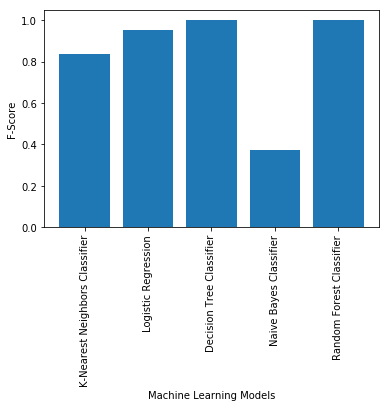

In [42]:
plt.bar(['K-Nearest Neighbors Classifier', 'Logistic Regression', 'Decision Tree Classifier', 'Naive Bayes Classifier', 'Random Forest Classifier'],\
        [f1_score(y_test, knn_pred, average= 'micro'),f1_score(y_test, lr_pred, average= 'micro'),f1_score(y_test, tree_pred, average= 'micro')\
        ,f1_score(y_test, nb_pred, average= 'micro'),f1_score(y_test, rf_pred, average= 'micro')])
plt.xticks(rotation='vertical')
plt.ylabel('F-Score')
plt.xlabel('Machine Learning Models')
plt.show()